In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
import pandas as pd
import numpy as np  

df=pd.read_csv('Mall_Customers.csv')
df.info()
df.describe()
df.isnull().sum()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Step 2: Visualize Selected Features

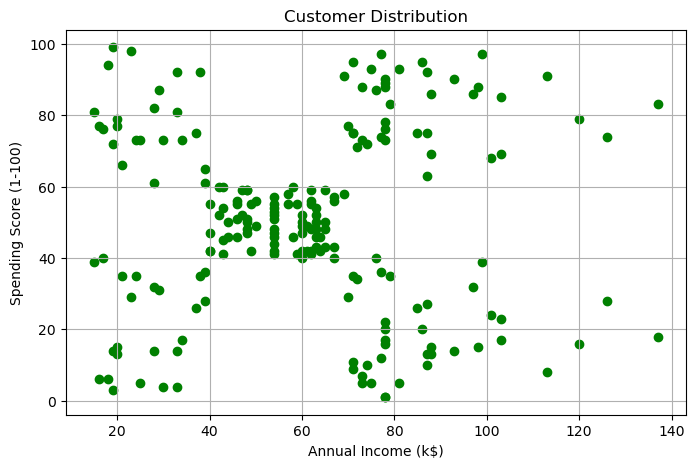

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c='green')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.grid(True)
plt.show()

# Step 3: Fit K-Means and Assign Cluster Labels
- 🧠 What:

We apply the K-Means clustering algorithm, which tries to group similar data points into K clusters based on feature similarity.

- 📌 Why:

To segment the customers into distinct groups (e.g., high income–low spending, low income–high spending, etc.) for targeted strategies like marketing or service design.

- ⚙️ How:

We’ll use Scikit-learn’s KMeans class to fit the model on the two selected features and assign each customer a cluster label.

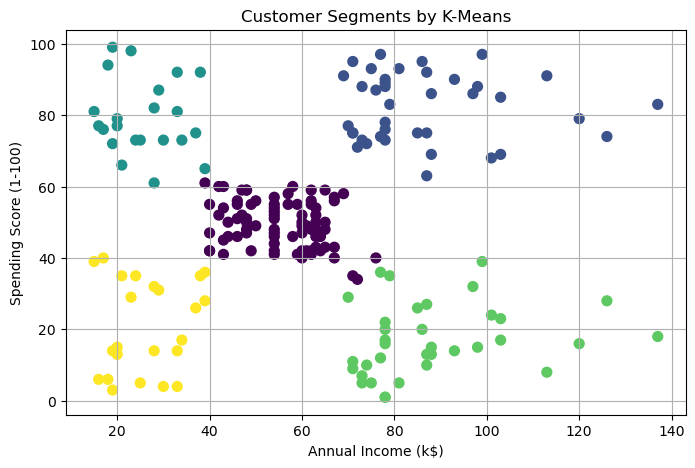

In [4]:
from sklearn.cluster import KMeans

# Extract features to be clustered
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Fit K-Means with an arbitrary number of clusters (e.g., K=5 for now)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by K-Means')
plt.grid(True)
plt.show()


# Step 4: Use the Elbow Method to Find Optimal K
## 🧠 What:

The Elbow Method helps you find the optimal number of clusters K by plotting the Within-Cluster Sum of Squares (WCSS) for different values of K.

## 📌 Why:

 - If K is too small → clusters are too broad.
 - If K is too large → clusters become too specific or even meaningless.
 - The "elbow" point in the plot is where adding more clusters no longer improves the model significantly.

## ⚙️ How:

Fit the KMeans model for a range of K (e.g., 1 to 10).

Record the inertia (WCSS) for each.

Plot inertia vs K and locate the "elbow".

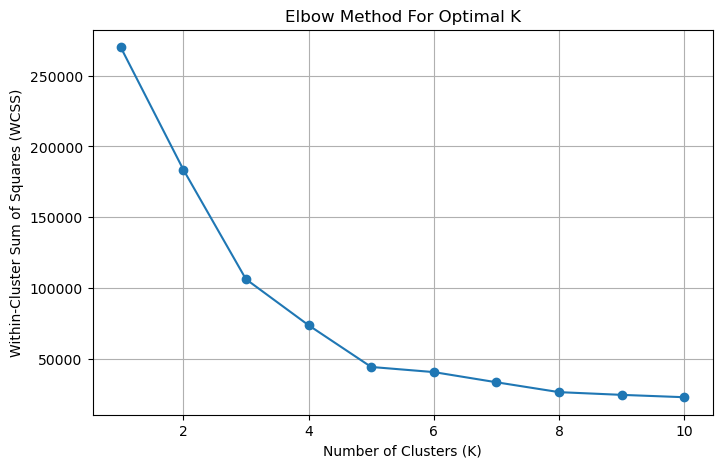

In [5]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()




📌 Interpreting the Elbow Plot:
From your graph, we can clearly see a sharp bend at K = 5, after which the decrease in WCSS slows down noticeably.

✅ So, the optimal number of clusters is likely K = 5.

This means 5 distinct customer segments are likely present in your dataset based on income and spending score.



# Step 5: Visualize Clusters with Color-Coding
🧠 What:
We’ll plot each customer as a point, colored by the cluster it belongs to. We'll also show the centroids of each cluster as big red Xs.

📌 Why:
Helps visually understand the separation between customer groups.

Easy to spot patterns like "low income – high spenders" or "high income – low spenders".

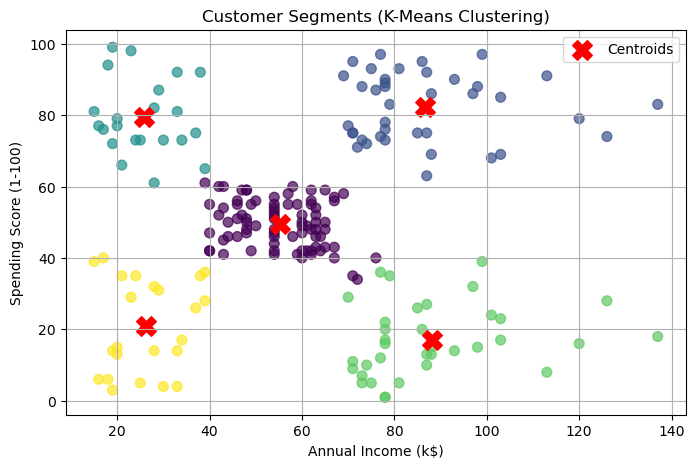

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cluster the data with K=5 again
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Plot with color coding
plt.figure(figsize=(8, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', s=200, marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means Clustering)')
plt.legend()
plt.grid(True)
plt.show()


# Step 6: Evaluate Clustering with Silhouette Score
🧠 What:
The Silhouette Score measures how well each point fits into its assigned cluster compared to other clusters.

📌 Why:
It helps evaluate the quality of clustering — a higher score indicates better-defined, well-separated clusters.

Score ranges from −1 to 1

~1.0 → well-clustered

~0.0 → overlapping clusters

~−1.0 → incorrect clustering

⚙️ How:
We'll use silhouette_score from Scikit-learn.

In [7]:
from sklearn.metrics import silhouette_score

# Use same feature set and cluster labels
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
labels = df['Cluster']

# Calculate the silhouette score
score = silhouette_score(features, labels)
print(f"Silhouette Score for K=5: {score:.4f}")


Silhouette Score for K=5: 0.5539


| Score Range    | Interpretation                        |
| -------------- | ------------------------------------- |
| **0.51 – 1.0** | ✔️ Strong structure (✅ we are here!) |
| 0.31 – 0.50    | ⚠️ Moderate structure                 |
| 0.1  – 0.30    | 🚫 Weak structure                     |
| < 0            | ❌ Incorrect clustering                |

So model is doing a great job distinguishing customer segments based on Annual Income and Spending Score.

# 📊 1️ Silhouette Plot (Optional but Insightful Visual)
🧠 What:
A Silhouette Plot shows how well each data point fits within its cluster. It’s like a bar for each point — longer bars = better fit.

📌 Why:
Shows if any clusters are poorly formed

Helps spot overlapping or misclassified points



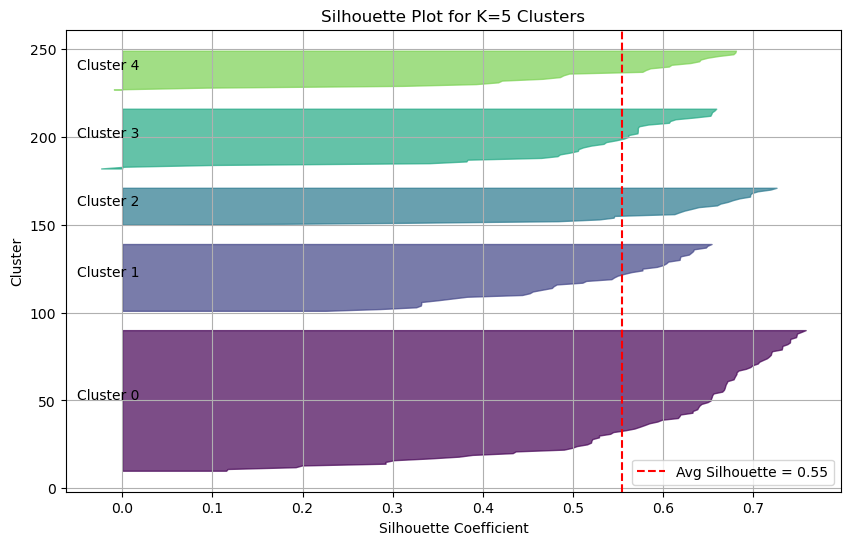

In [8]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(features, labels)

# Number of clusters
n_clusters = len(np.unique(labels))
y_lower = 10

plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    
    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10  # 10 for spacing between plots

plt.axvline(x=score, color="red", linestyle="--", label=f'Avg Silhouette = {score:.2f}')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Plot for K=5 Clusters')
plt.legend()
plt.grid(True)
plt.show()


# 🔖 Cluster Profiling: Naming the Customer Segments
🧠 What:
We'll look at the centroids of each cluster (mean Annual Income and Spending Score), and based on that, assign meaningful business-oriented names.

In [9]:
# Refit KMeans just to access cluster centers again
from sklearn.cluster import KMeans

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Extract cluster centers
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
print(centroids)


   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


In [10]:
cluster_names = {
    0: 'Average Segment',
    1: 'Premium Customers',
    2: 'Target Shoppers',
    3: 'Careful Rich',
    4: 'Worried Shoppers'
}

df['Segment'] = df['Cluster'].map(cluster_names)


**🧠 Reasoning Behind Names**

Cluster 1 (Premium Customers): High income + High spending → Most valuable segment.

Cluster 2 (Target Shoppers): Low income + High spending → Spend more than expected → Can be targeted with budget offers.

Cluster 3 (Careful Rich): High income + Low spending → May need luxury marketing or trust-building.

Cluster 4 (Worried Shoppers): Low income + Low spending → Price-sensitive or cautious buyers.

Cluster 0 (Average Segment): Middle ground → Balanced customers.

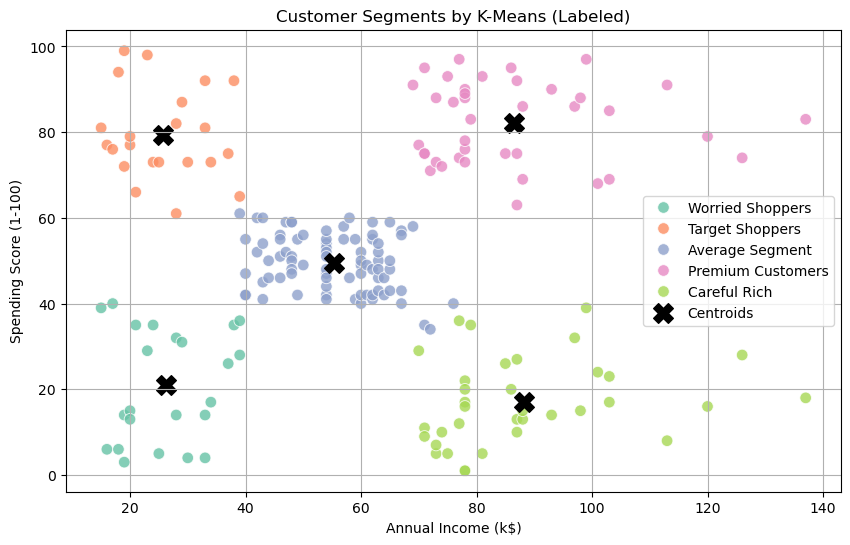

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot using seaborn for cleaner labels and color mapping
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Segment',  # use named segments here
    palette='Set2',
    s=70,
    alpha=0.8
)

# Plot centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'],
            c='black', s=200, marker='X', label='Centroids')

plt.title('Customer Segments by K-Means (Labeled)')
plt.legend()
plt.grid(True)
plt.show()
